## Cleaning and exploration of medical insurance data

#### Importing required modules

In [410]:
# Basic plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)
sns.color_palette('bright')

# Feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Test Train split
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Evaluation
from sklearn.metrics import mean_squared_error

#### Reading and describing the data

In [291]:
df = pd.read_csv("medical_insurance.csv")

In [292]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### Checking for null values

In [293]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [294]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [296]:
categorical_features = ['sex', 'smoker', 'region']
for feature in categorical_features:
    print("Distribution of", feature)
    print(df[feature].value_counts())
    print("\n")

Distribution of sex
male      1406
female    1366
Name: sex, dtype: int64


Distribution of smoker
no     2208
yes     564
Name: smoker, dtype: int64


Distribution of region
southeast    766
southwest    684
northwest    664
northeast    658
Name: region, dtype: int64




In [297]:
df.groupby(['sex']).agg({'charges': ['count', 'mean'], 'bmi': 'mean', 'age': 'mean'})


charges                      bmi        age
         count          mean       mean       mean
sex                                               
female    1366  12486.831977  30.434473  39.481698
male      1406  14013.872721  30.960633  38.748222

In [298]:
df.groupby(['children']).agg({'charges': ['count', 'mean'], 'bmi': 'mean', 'age': 'mean'})

charges                      bmi        age
           count          mean       mean       mean
children                                            
0           1186  12317.920881  30.628508  38.431703
1            672  12722.650521  30.705744  39.300595
2            496  15268.182723  31.035806  39.286290
3            324  15304.070620  30.580000  41.395062
4             52  13550.983876  31.314615  38.769231
5             42   8706.036629  28.915000  35.904762

In [299]:
df.groupby(['region']).agg({'charges': ['count', 'mean'], 'bmi': 'mean', 'age': 'mean'})

charges                      bmi        age
            count          mean       mean       mean
region                                               
northeast     658  13475.874737  29.157781  39.243161
northwest     664  12463.129315  29.147259  39.081325
southeast     766  14748.777706  33.478773  38.762402
southwest     684  12164.196435  30.584503  39.397661

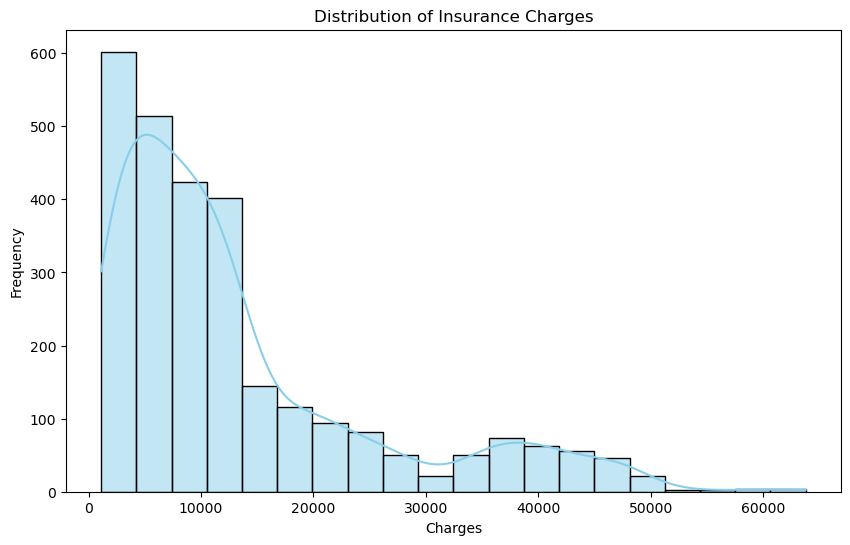

In [300]:
sns.histplot(df['charges'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

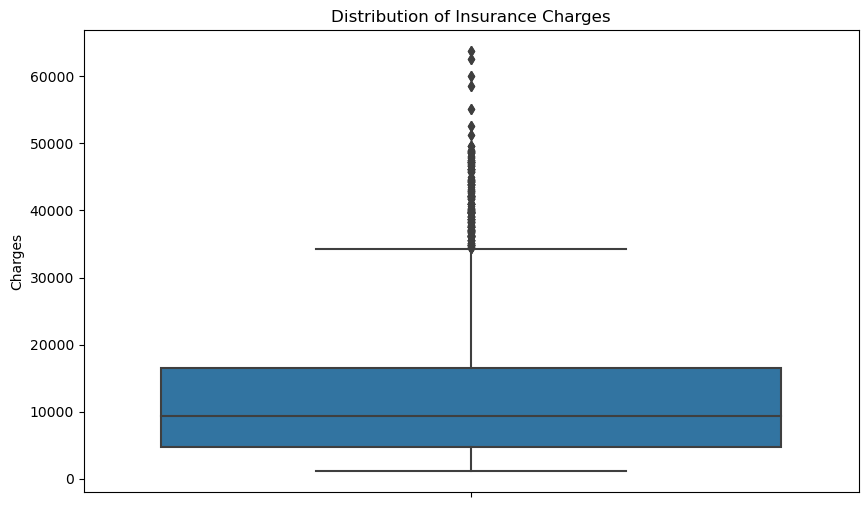

In [301]:
sns.boxplot(y='charges', data=df)
plt.title('Distribution of Insurance Charges')
plt.ylabel('Charges')
# plt.ylabel('Frequency')
plt.show()

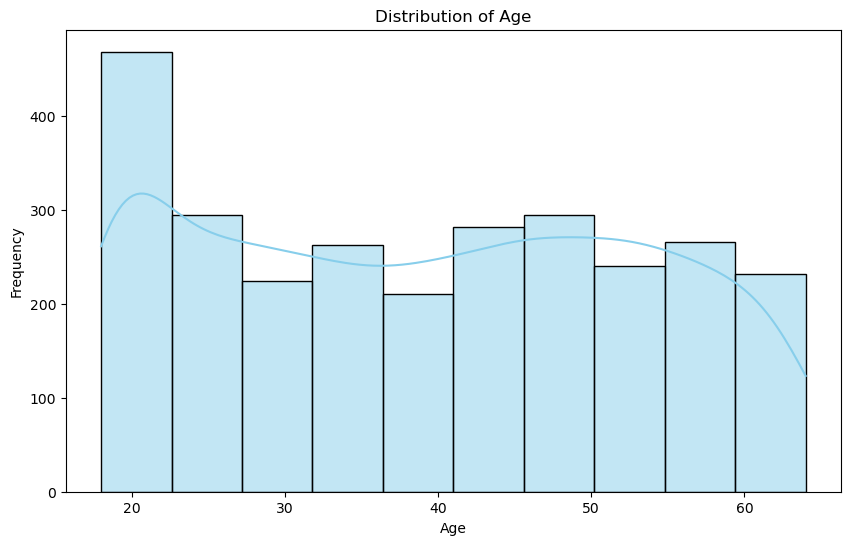

In [302]:
sns.histplot(df['age'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

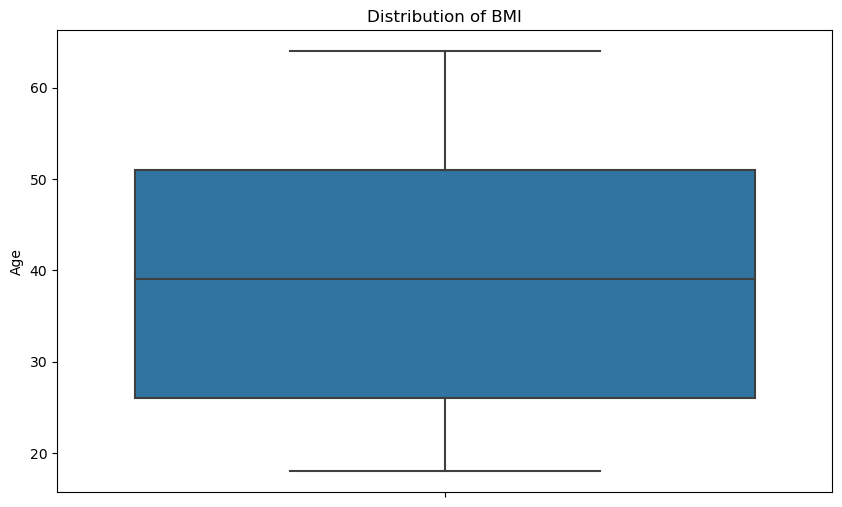

In [303]:
sns.boxplot(y='age', data=df)
plt.title('Distribution of BMI')
plt.ylabel('Age')
# plt.ylabel('Frequency')
plt.show()

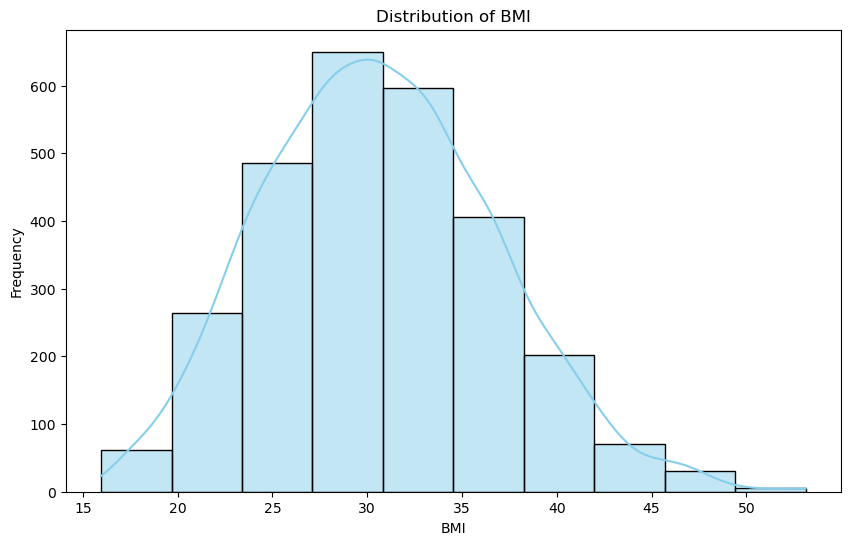

In [304]:
sns.histplot(df['bmi'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

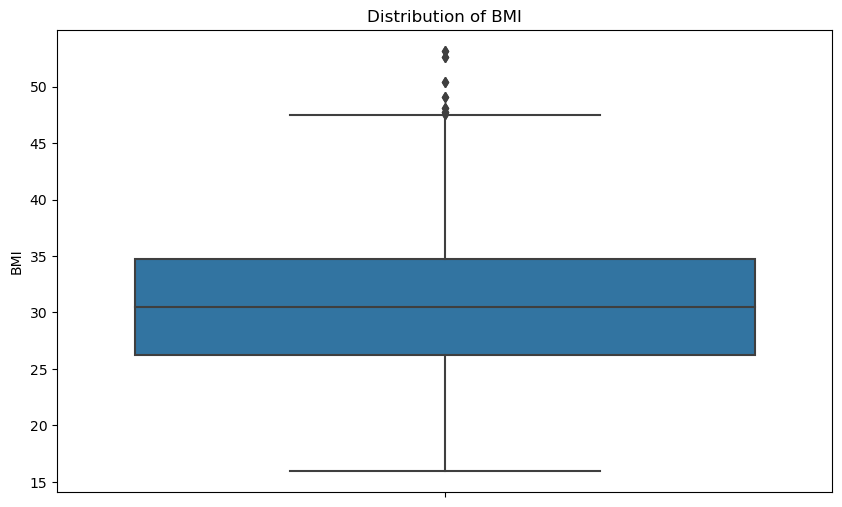

In [305]:
sns.boxplot(y='bmi', data=df)
plt.title('Distribution of BMI')
plt.ylabel('BMI')
# plt.ylabel('Frequency')
plt.show()

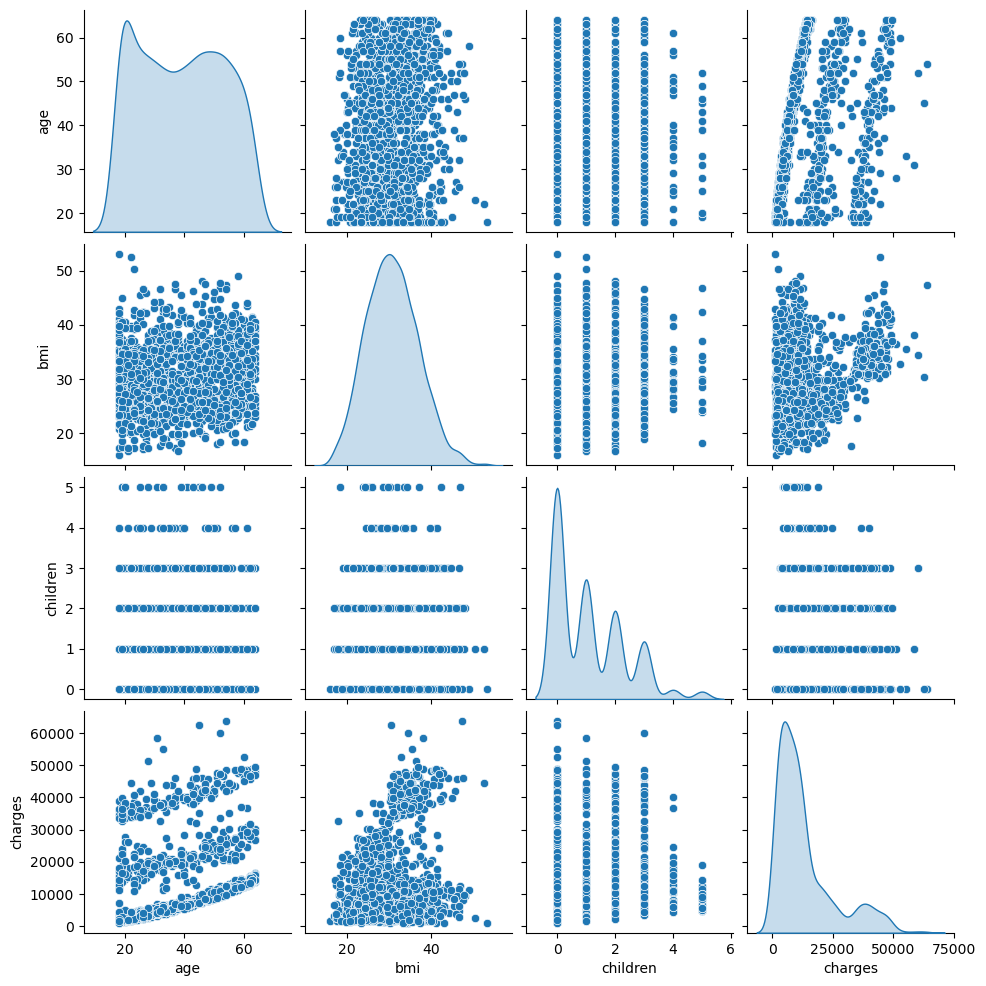

In [306]:
sns.pairplot(df, diag_kind='kde')
plt.show()

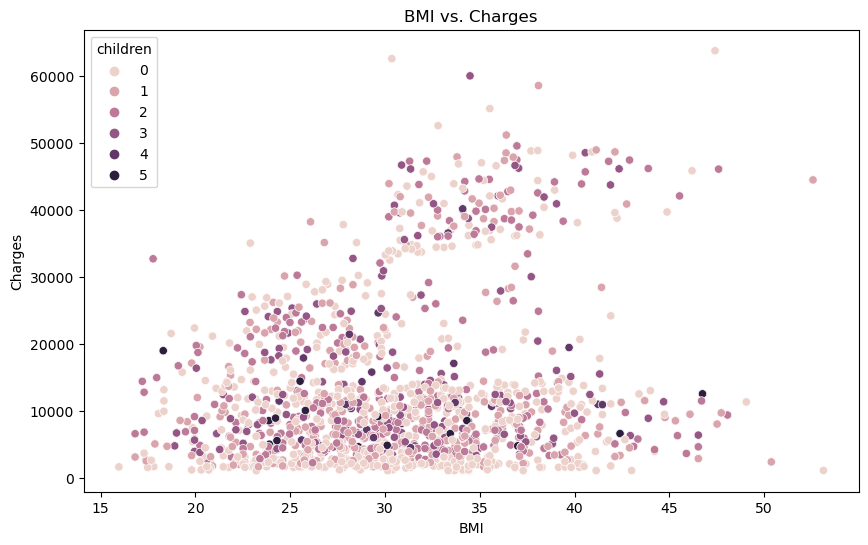

In [315]:
sns.scatterplot(data=df, x="bmi", y="charges", hue="children")    
#plt.plot(actual, actual, color='red', linestyle='--')  # Add a line of perfect prediction (y=x)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs. Charges')
plt.show()

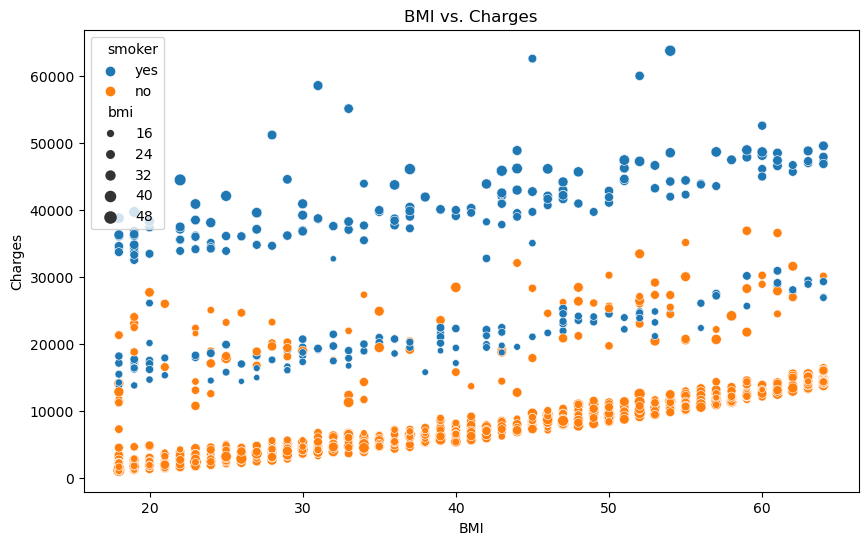

In [321]:
sns.scatterplot(data=df, x="age", y="charges", hue="smoker", size="bmi")    
#plt.plot(actual, actual, color='red', linestyle='--')  # Add a line of perfect prediction (y=x)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs. Charges')
plt.show()

categorical_features = ['sex', 'smoker', 'region']

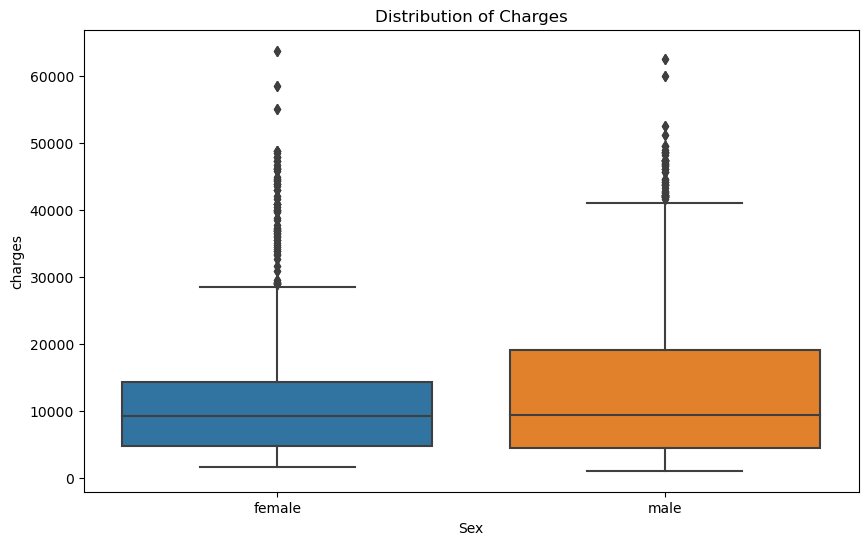

In [310]:
sns.boxplot(y='charges', x= "sex", data=df)
plt.title('Distribution of Charges')
plt.xlabel('Sex')
# plt.ylabel('Frequency')
plt.show()

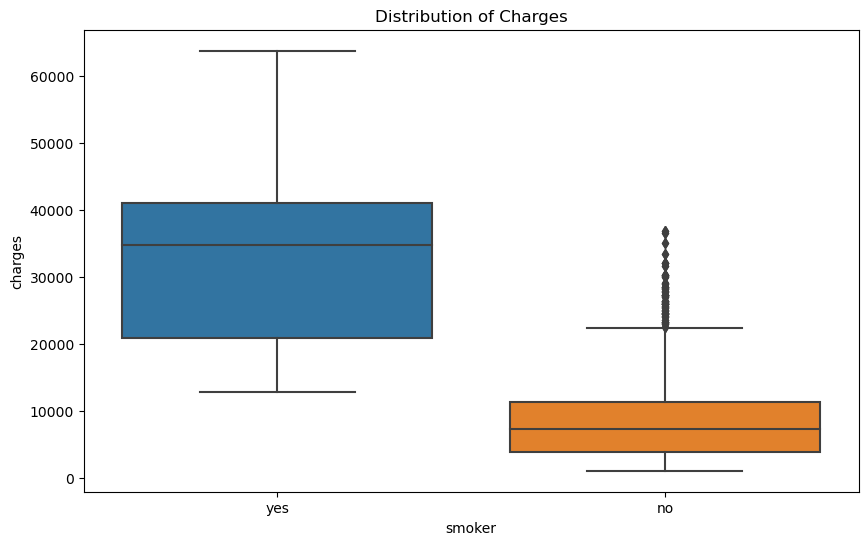

In [314]:
sns.boxplot(y='charges', x= "smoker", data=df)
plt.title('Distribution of Charges')
plt.xlabel('smoker')
# plt.ylabel('Frequency')
plt.show()

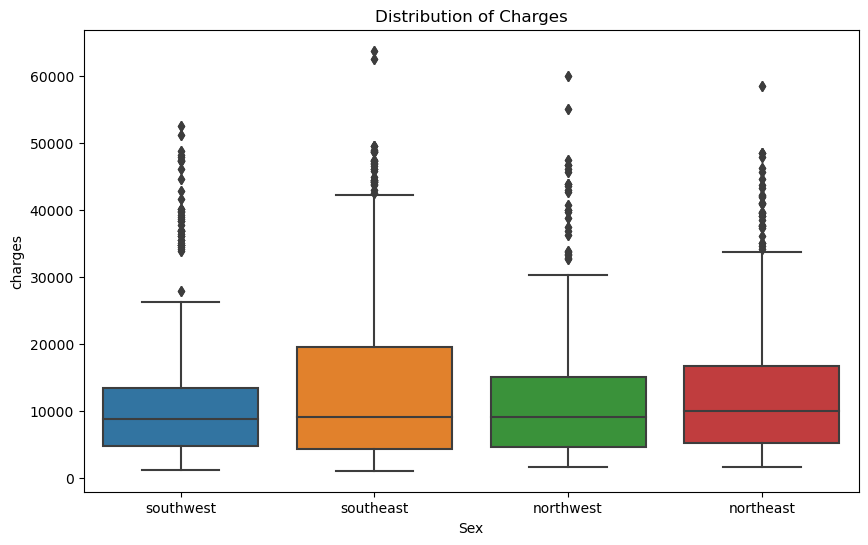

In [312]:
sns.boxplot(y='charges', x= "region", data=df)
plt.title('Distribution of Charges')
plt.xlabel('Sex')
# plt.ylabel('Frequency')
plt.show()

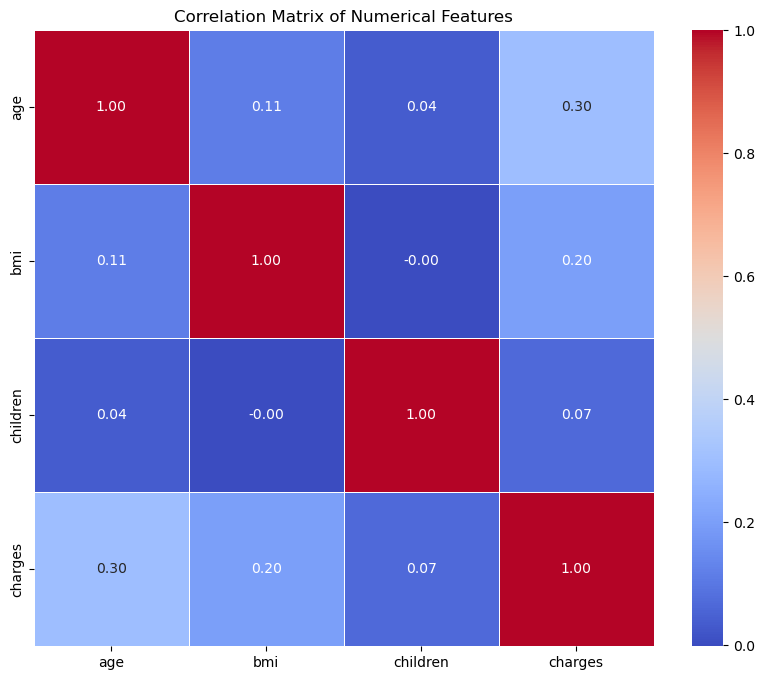

In [313]:
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### Test Train Split

In [497]:
# Separate features (X) and target variable (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Split the dataset into training and testing sets
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train_orig.copy()
X_test = X_test_orig.copy()

#### Scaling X and Y

In [498]:
X_scaler = StandardScaler()
X_scaler.fit(X_train[['age','bmi','children']])
print(X_scaler.mean_)

[39.08254398 30.68718539  1.10419486]


In [499]:
X_scaled_df = X_scaler.transform(X_train[['age','bmi','children']])
X_scaled_df = pd.DataFrame(X_scaled_df, columns=('sc_age','sc_bmi','sc_children'), index=X_train.index)

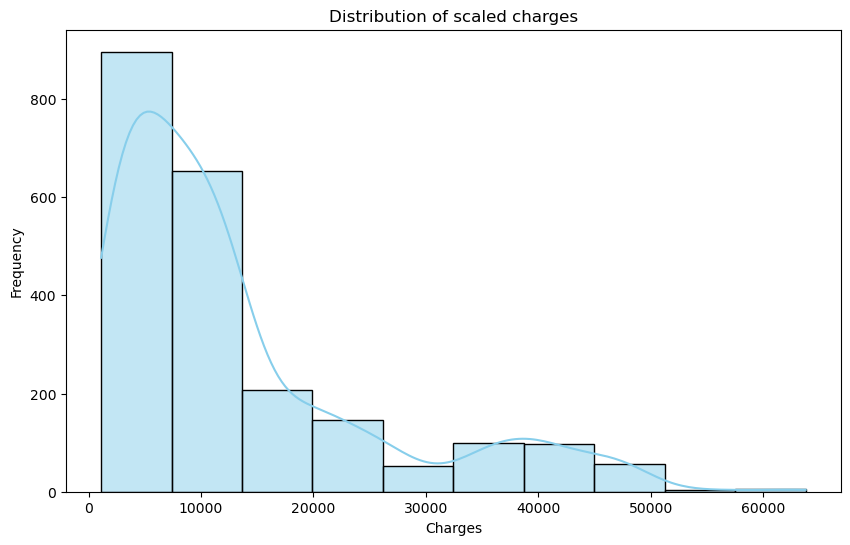

In [500]:
sns.histplot(y_train, kde=True, bins=10, color='skyblue')
plt.title('Distribution of scaled charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

##### Encoding Categorical Variables

In [501]:
region_OHencoder = OneHotEncoder(sparse=False)
new_df = region_OHencoder.fit_transform(X_train[['region']])
en_df = pd.DataFrame(new_df, columns=("northeast","northwest","southeast","southwest"), index=X_train.index)
en_df.drop(columns=["northeast"], inplace=True)
cols_float = ["northwest","southeast","southwest"]
en_df = en_df.applymap(np.int64)

In [502]:
# Initialize LabelEncoder
label_encoder_sex = LabelEncoder()
label_encoder_smoker = LabelEncoder()

# Encode 'Sex', 'Smoker', and 'Region' columns
X_train['sex'] = label_encoder_sex.fit_transform(X_train['sex'])
X_train['smoker'] = label_encoder_smoker.fit_transform(X_train['smoker'])

In [503]:
cat_encoded = X_train.join(en_df)
cat_encoded.drop(columns=["age", "bmi", "region","children"], inplace=True)

In [504]:
X_train_scaled = cat_encoded.join(X_scaled_df)

In [505]:
X_train_scaled.isnull().sum()

sex            0
smoker         0
northwest      0
southeast      0
southwest      0
sc_age         0
sc_bmi         0
sc_children    0
dtype: int64

In [506]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
print(lr_model.feature_names_in_)
print(lr_model.coef_)

['sex' 'smoker' 'northwest' 'southeast' 'southwest' 'sc_age' 'sc_bmi'
 'sc_children']
[ -125.28870613 24041.29564321  -461.10058072 -1046.08029605
 -1154.31845329  3623.80365166  2064.35624744   598.72703241]


In [507]:
#Prepare X test same way
X_test_scaled_cont = X_scaler.transform(X_test[['age','bmi','children']])
X_test_scaled_cont = pd.DataFrame(X_test_scaled_cont, columns=('sc_age','sc_bmi','sc_children'), index=X_test.index)

X_test_ohe_reg = region_OHencoder.transform(X_test[['region']])
X_test_ohe_reg = pd.DataFrame(X_test_ohe_reg, columns=("northeast","northwest","southeast","southwest"), index=X_test.index)
X_test_ohe_reg.drop(columns=["northeast"], inplace=True)
X_test_ohe_reg = X_test_ohe_reg.applymap(np.int64)

# Encode 'Sex', 'Smoker'
X_test['sex'] = label_encoder_sex.transform(X_test['sex'])
X_test['smoker'] = label_encoder_smoker.transform(X_test['smoker'])


X_test_cat_encoded = X_test.join(X_test_ohe_reg)
X_test_cat_encoded.drop(columns=["age", "bmi", "region","children"], inplace=True)

X_test_scaled = X_test_cat_encoded.join(X_test_scaled_cont)

In [508]:
# Make predictions on the test set
lr_predictions = lr_model.predict(X_test_scaled)

# Compute the Mean Squared Error (MSE) of the Linear Regression model
lr_mse = mean_squared_error(y_test, lr_predictions)
print("Mean Squared Error (Linear Regression):", lr_mse)

Mean Squared Error (Linear Regression): 36908282.771720156


In [509]:
r_sqr = lr_model.score(X_test_scaled, y_test)
r_sqr

0.7429591136675093

In [510]:
print(f"intercept: {lr_model.intercept_}")
print(f"slope: {lr_model.coef_}")

intercept: 9120.375445600639
slope: [ -125.28870613 24041.29564321  -461.10058072 -1046.08029605
 -1154.31845329  3623.80365166  2064.35624744   598.72703241]


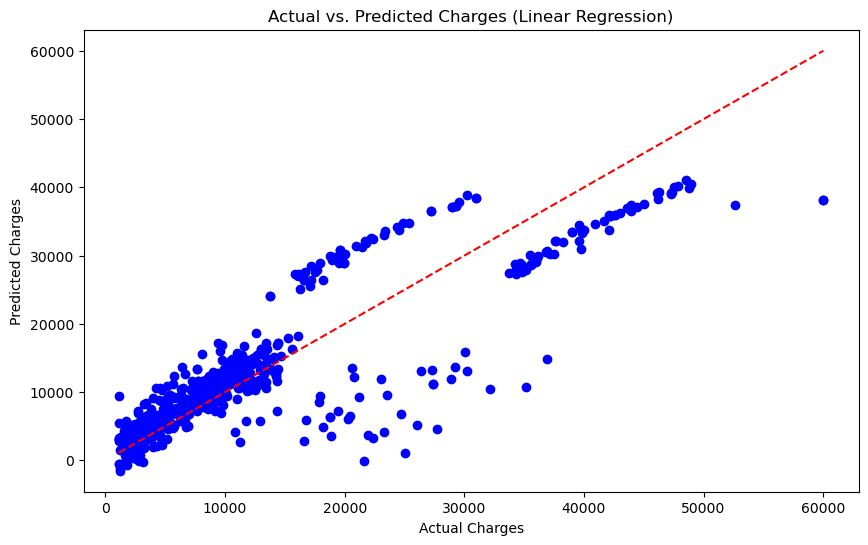

In [511]:
plt.scatter(y_test, lr_predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges (Linear Regression)')
plt.show()


In [520]:
train_pred_df = X_train_orig.copy()
train_pred_df['charges'] = y_train.to_list()
train_pred_df['charges_pred'] = lr_model.predict(X_train_scaled)

In [521]:
train_pred_df

,age,sex,bmi,children,smoker,region,charges,charges_pred
2390,47,male,19.190,1,no,northeast,8627.54110,7143.234834
1283,18,male,30.030,1,no,southeast,1720.35370,2248.628668
210,20,male,33.000,1,no,southwest,1980.07000,3647.172141
896,43,female,20.045,2,yes,northeast,19798.05455,31061.184830
1882,31,female,23.600,2,no,southwest,4931.64700,3962.361540
...,...,...,...,...,...,...,...,...
738,23,male,31.730,3,yes,northeast,36189.10170,30183.205385
963,46,male,24.795,3,no,northeast,9500.57305,9749.239901
400,51,female,20.600,0,no,southwest,9264.79700,7119.161943
639,56,male,33.660,4,no,southeast,12949.15540,14734.534585


In [522]:
train_lr_mse = mean_squared_error(train_pred_df['charges'], train_pred_df['charges_pred'])
print("Mean Squared Error (Linear Regression):", train_lr_mse)

Mean Squared Error (Linear Regression): 36740509.94755047


In [523]:
test_pred_df = X_test_orig.copy()
test_pred_df['charges'] = y_test.to_list()
test_pred_df['charges_pred'] = lr_model.predict(X_test_scaled)

In [524]:
test_lr_mse = mean_squared_error(test_pred_df['charges'], test_pred_df['charges_pred'])
print("Mean Squared Error (Linear Regression):", test_lr_mse)

Mean Squared Error (Linear Regression): 36908282.771720156


In [525]:
test_pred_df['residual'] = test_pred_df['charges'] - test_pred_df['charges_pred']

In [527]:
test_pred_df['residual']

2087    -6536.692390
1118     6219.962548
2167    -4315.690992
1666   -10157.466962
772      1023.789963
            ...     
2542     8712.588818
1408    -1974.699360
2040    -1918.250460
2104    -3322.218037
1777    -3053.376168
Name: residual, Length: 555, dtype: float64

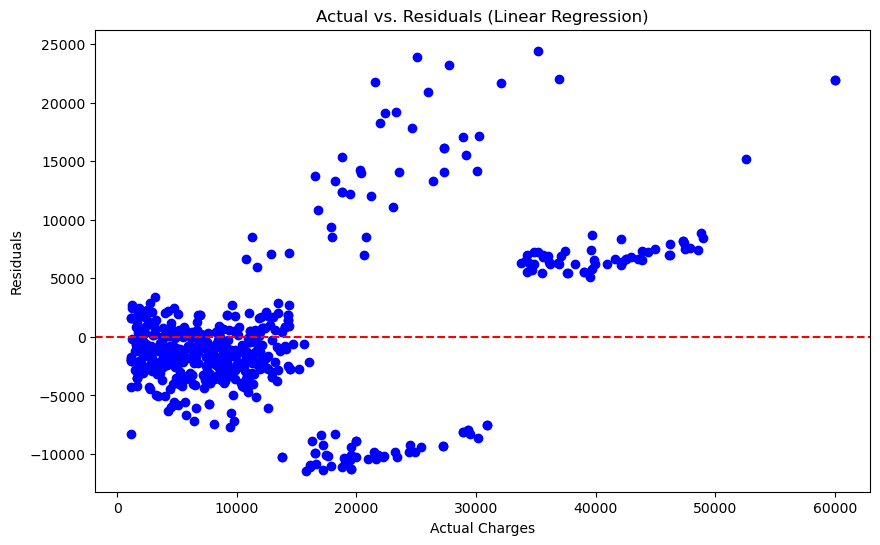

In [528]:
plt.scatter(y=test_pred_df['residual'], x=test_pred_df['charges'], color='blue')
plt.plot(color='red', linestyle='--')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Residuals')
plt.title('Actual vs. Residuals (Linear Regression)')
plt.show()


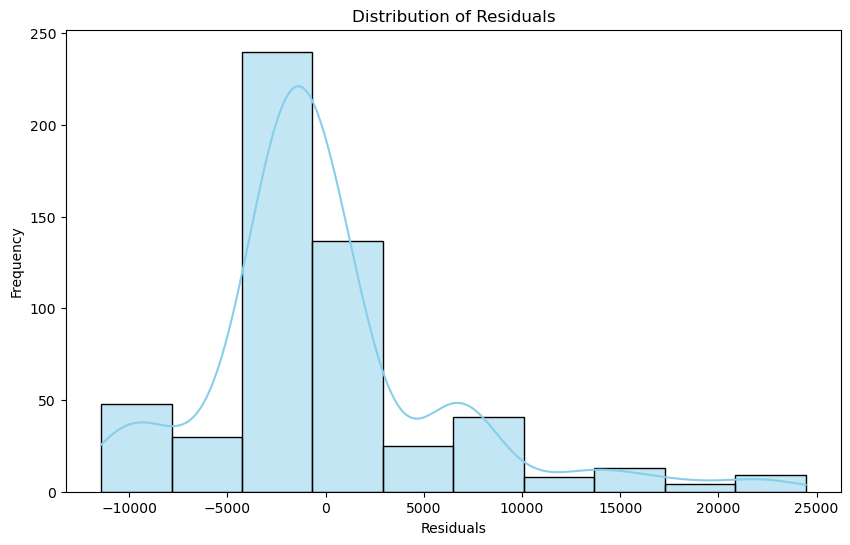

In [529]:
sns.histplot(test_pred_df['residual'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [530]:
def act_vs_pred_plot(actual, predicted):
    plt.scatter(actual, predicted, color='blue')
    plt.plot(actual, actual, color='red', linestyle='--')  # Add a line of perfect prediction (y=x)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.show()
    return None

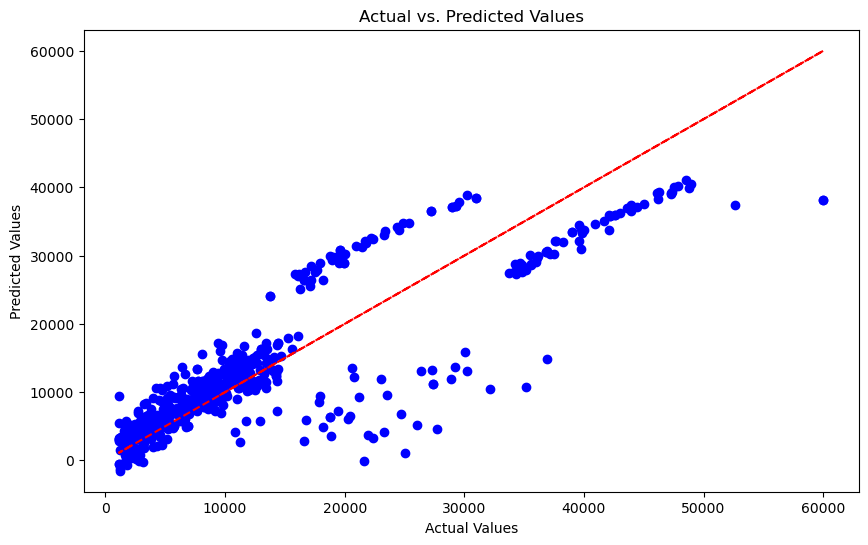

In [531]:
act_vs_pred_plot(test_pred_df['charges'], test_pred_df['charges_pred'])
# Scale the cefficients
# Regulaization parameter
# Change test train split before scaling
# 

In [534]:
categorical_features = ['sex', 'smoker', 'region']
for feature in categorical_features:
    print("Distribution of", feature , " in Xtrain")
    print(X_train[feature].value_counts())
    print("\n")
    print("Distribution of", feature , " in Xtest")
    print(X_test[feature].value_counts())
    print("="*20)
    print("\n")

Distribution of sex  in Xtrain
1    1133
0    1084
Name: sex, dtype: int64


Distribution of sex  in Xtest
0    282
1    273
Name: sex, dtype: int64


Distribution of smoker  in Xtrain
0    1761
1     456
Name: smoker, dtype: int64


Distribution of smoker  in Xtest
0    447
1    108
Name: smoker, dtype: int64


Distribution of region  in Xtrain
southeast    605
southwest    549
northwest    539
northeast    524
Name: region, dtype: int64


Distribution of region  in Xtest
southeast    161
southwest    135
northeast    134
northwest    125
Name: region, dtype: int64




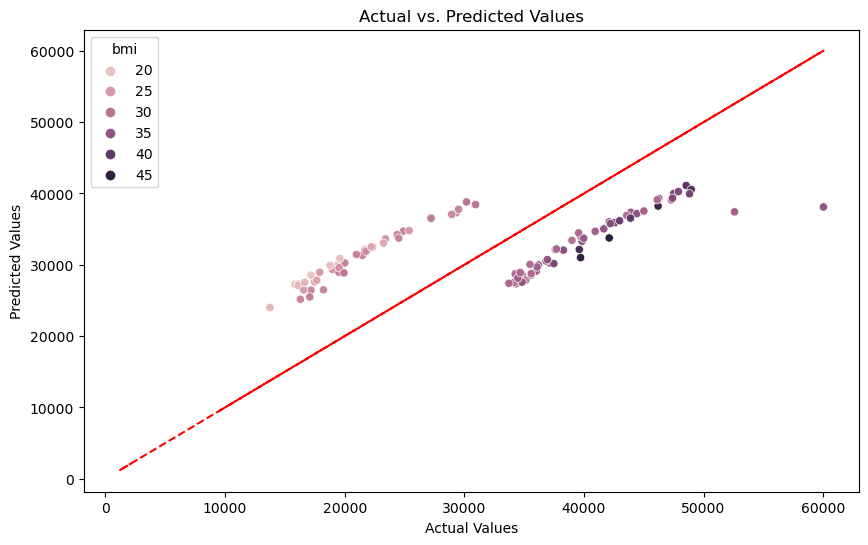

In [536]:
sns.scatterplot(data=test_pred_df[test_pred_df['smoker'] == 'yes'], x='charges', y='charges_pred', hue='bmi')
plt.plot(test_pred_df['charges'], test_pred_df['charges'], color='red', linestyle='--')  # Add a line of perfect prediction (y=x)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

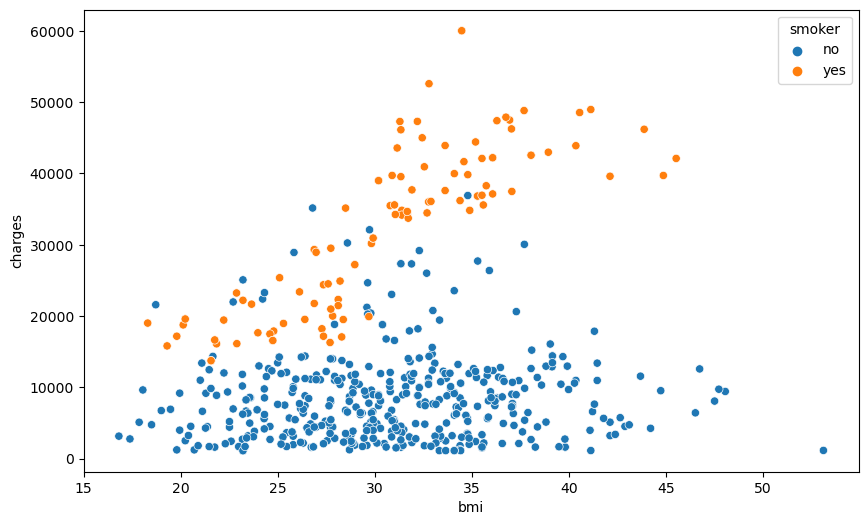

In [537]:
sns.scatterplot(data=test_pred_df, x='bmi', y='charges', hue='smoker')
#plt.plot(test_df['charges'], test_df['charges'], color='red', linestyle='--')  # Add a line of perfect prediction (y=x)
plt.show()

In [538]:
test_pred_df[(test_pred_df['smoker'] == 'yes') & (test_pred_df['residual'] > 0)].describe()

,age,bmi,children,charges,charges_pred,residual
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,39.864407,34.863644,1.084746,41284.823643,33843.243746,7441.579898
std,14.346041,3.763872,1.118622,5961.833881,4190.096893,3065.794006
min,18.000000,28.500000,0.000000,33732.686700,27336.849120,5084.101851
25%,27.000000,31.705000,0.000000,36517.583000,30114.989405,6252.686694
50%,43.000000,34.485000,1.000000,39836.519000,33767.607993,6655.095847
75%,52.000000,36.532500,2.000000,44716.379250,37396.809751,7446.130516
max,64.000000,45.540000,3.000000,60021.398970,41116.600051,21911.163685


In [539]:
test_pred_df[(test_pred_df['smoker'] == 'yes') & (test_pred_df['residual'] < 0)].describe()

,age,bmi,children,charges,charges_pred,residual
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,40.387755,25.485306,1.163265,21380.634882,31126.284636,-9745.649755
std,14.410379,3.240372,1.328328,4864.287094,4206.492168,1079.231638
min,18.000000,18.300000,0.000000,13747.872350,24013.433942,-11432.568839
25%,29.000000,22.895000,0.000000,17496.306000,27603.175357,-10404.851799
50%,40.000000,26.885000,1.000000,19933.458000,30262.335611,-9896.102884
75%,52.000000,27.835000,2.000000,24520.264000,34243.190905,-8932.624460
max,64.000000,29.920000,5.000000,30942.191800,38819.617403,-7501.734049
